In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random


def initialization():
  # Define constants
  GRID_SIZE = 10
  SNAKE_START_LENGTH = 3
  FRUIT_REWARD = 2

  # Initialize grid
  grid = np.zeros((GRID_SIZE, GRID_SIZE))

  # Initialize snake
  snake = []
  head_x, head_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
  snake.append((head_x, head_y))
  for _ in range(SNAKE_START_LENGTH - 1):
      snake.append((snake[-1][0], snake[-1][1] + 1))  # Extend snake vertically

  # Place fruit
  fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
  while (fruit_x, fruit_y) in snake:
      fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
  grid[fruit_x, fruit_y] = FRUIT_REWARD
  return GRID_SIZE, grid, snake, fruit_x, fruit_y

# Define function to calculate Manhattan distance
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)


# Define function to move snake towards fruit
def move_towards_fruit(snake, fruit_x, fruit_y, grid):
    head_x, head_y = snake[0]
    neck_x, neck_y = snake[1]
    if head_x < fruit_x and grid[head_x+1,head_y] != 0.5:
        return 2  # Move down
    elif head_x > fruit_x and grid[head_x-1,head_y] != 0.5:
        return 0  # Move up
    elif head_y < fruit_y and grid[head_x, head_y+1] != 0.5:
        return 1  # Move right
    elif head_y > fruit_y and grid[head_x, head_y-1] != 0.5:
        return 3  # Move left
    elif grid[head_x+1,head_y] == grid[head_x-1,head_y] == grid[head_x, head_y+1] == grid[head_x, head_y-1] == 0.5:
        return -1
    else:
        return -2  # Already at fruit position

# Define function to visualize grid
def visualize_grid(grid):
    plt.imshow(grid, cmap='viridis', origin='lower')
    plt.colorbar()
    plt.show()




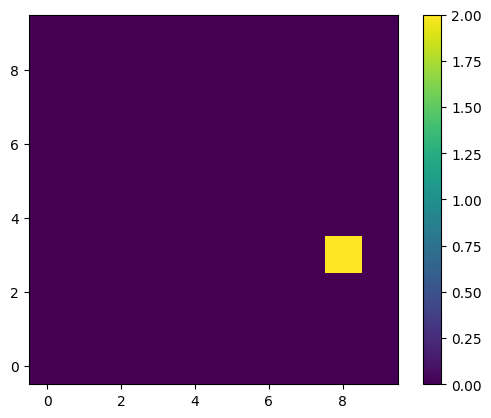

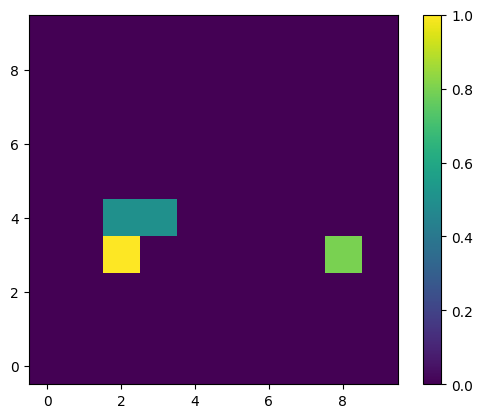

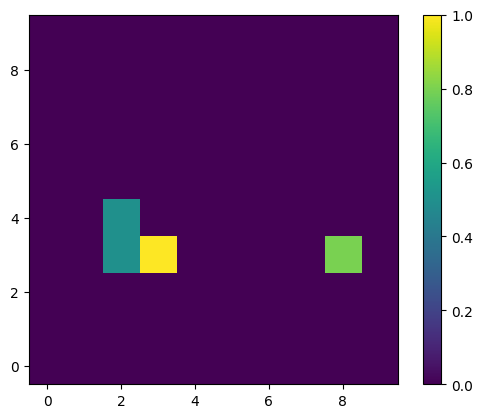

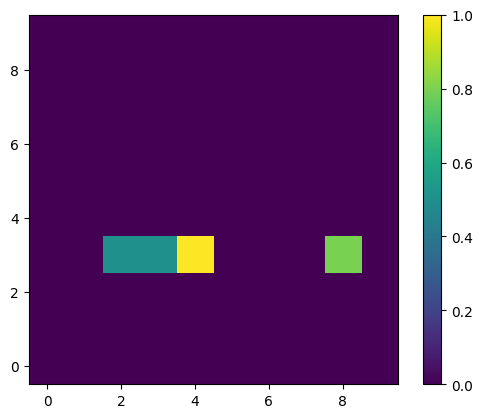

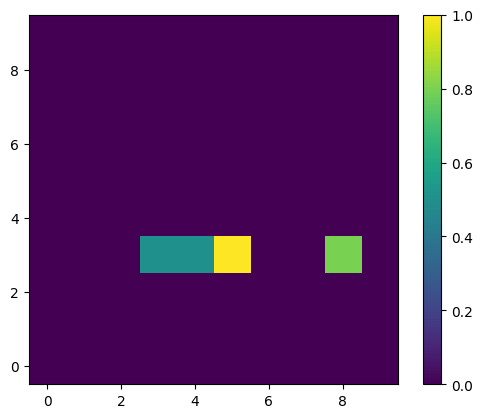

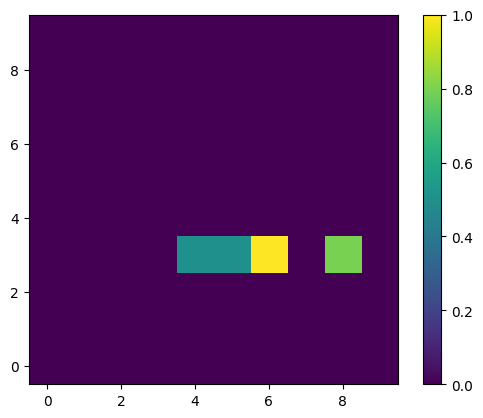

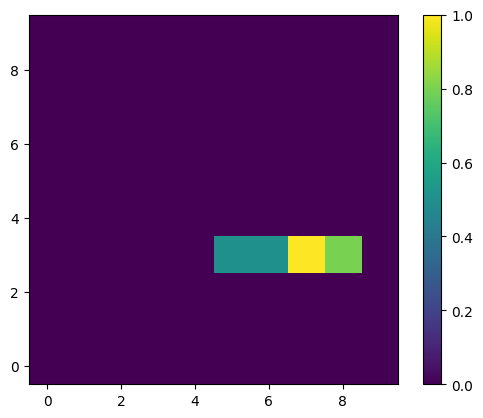

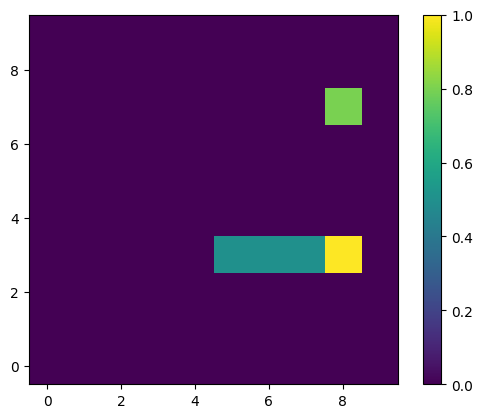

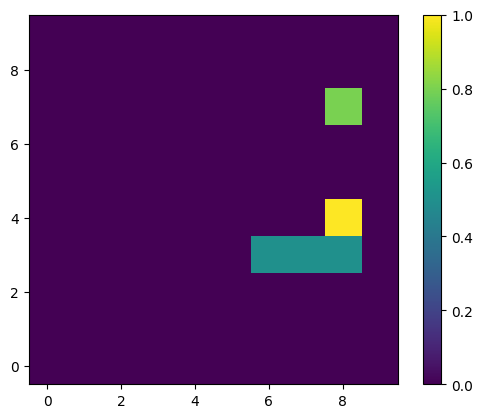

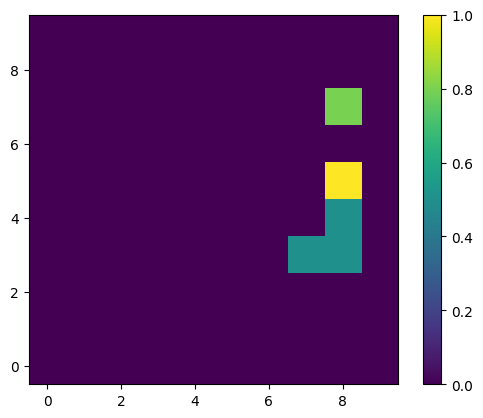

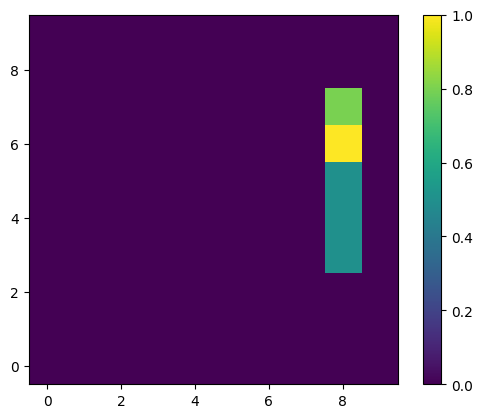

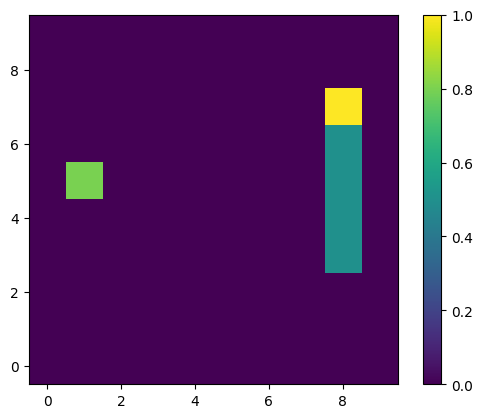

KeyboardInterrupt: 

In [7]:
GRID_SIZE, grid, snake, fruit_x, fruit_y = initialization()

# Main game loop
while True:
    # Visualize grid
    visualize_grid(grid)

    # Move snake towards fruit
    direction = int(move_towards_fruit(snake, fruit_x, fruit_y,grid))
    if direction >= 0:
        head_x, head_y = snake[0]
        if direction == 0:  # Move up
            head_x = (head_x - 1) % GRID_SIZE
        elif direction == 1:  # Move right
            head_y = (head_y + 1) % GRID_SIZE
        elif direction == 2:  # Move down
            head_x = (head_x + 1) % GRID_SIZE
        elif direction == 3:  # Move left
            head_y = (head_y - 1) % GRID_SIZE
        # Check if snake eats fruit
        if (head_x, head_y) == (fruit_x, fruit_y):
            # Generate new fruit
            fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            while (fruit_x, fruit_y) in snake:
                fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
            grid[fruit_x, fruit_y] = 2
            # Extend snake length
            snake.insert(0, (head_x, head_y))
        else:
            # Move snake forward
            snake.insert(0, (head_x, head_y))
            tail_x, tail_y = snake.pop()
    elif direction == -1:
      print('Game Over')
    else:
        # Already at fruit position, generate new fruit
        fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        while (fruit_x, fruit_y) in snake:
            fruit_x, fruit_y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        grid[fruit_x, fruit_y] = 2

    # Update grid with snake positions
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for i, (x, y) in enumerate(snake):
        if i == 0:
            grid[x, y] = 1  # Head of snake
        else:
            grid[x, y] = 0.5  # Body of snake
    grid[fruit_x, fruit_y] = 0.8  # Fruit color

    # Pause for visualization
    plt.pause(0.5)